#Meg's Data

In [55]:
from __future__ import division

%matplotlib inline
import pandas as pd
import thinkdsp
import thinkplot
import autocorr
import numpy as np

In [56]:
meg_data_file_names = ['data/meg_walking_long.csv','data/meg_jogging.csv','data/meg_upstairs.csv','data/meg_downstairs.csv']
meg_data_dict = {}
activites = ['walking', 'jogging', 'upstairs', 'downstairs']
for i,file in enumerate(meg_data_file_names):
    df = pd.read_csv(file)
    meg_data_dict[activites[i]] = df
print meg_data_dict

{'walking':              x          y         z           time
0     1.070208   8.382100  4.165911  1430013460575
1     2.254141   8.625112  5.571906  1430013460750
2     0.966060   7.949348  3.493140  1430013460929
3     1.632845   8.259995  3.992930  1430013461109
4     0.798466   7.684789  5.673061  1430013461290
5     0.821211   8.486248  3.448249  1430013461473
6     0.236427   8.675390  2.829348  1430013461657
7    -0.120309   7.922413  3.145382  1430013461835
8     1.056442   9.352949  3.304597  1430013462013
9     0.059855   5.515044  5.877765  1430013462192
10    1.671751   6.495469  8.664616  1430013462376
11    0.513556   5.140950  9.601347  1430013462557
12    0.964265   4.693234  9.236232  1430013462735
13    2.042853   3.417723  7.286154  1430013462914
14    4.371214   4.903924  8.091205  1430013463097
15    3.216610   3.854665  7.056910  1430013463273
16    1.354520   3.590105  8.307282  1430013463454
17    1.634641   3.745729  8.455123  1430013463632
18    0.724246   3.

In [57]:
def evenly_sample_ts(ts):
    return np.linspace(ts.min(), ts.max(), len(ts))

###Data viewing of full data set

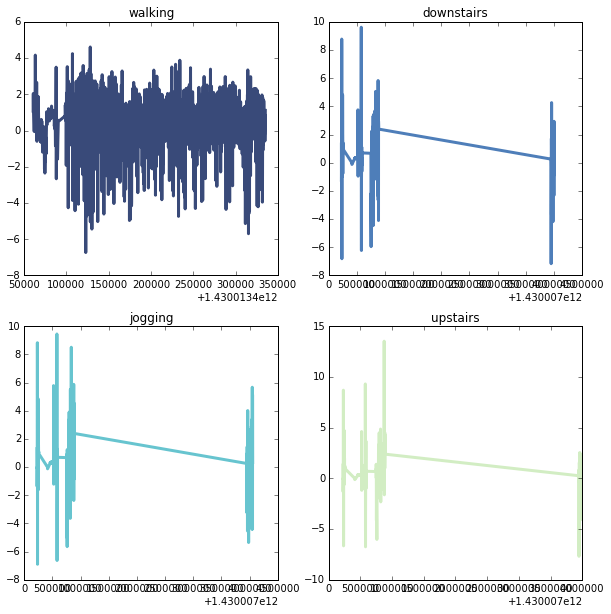

In [58]:
thinkplot.preplot(4, 2, 2)

for plotnum, (activity, data) in enumerate(meg_data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=activity)

###Plot the spectrum

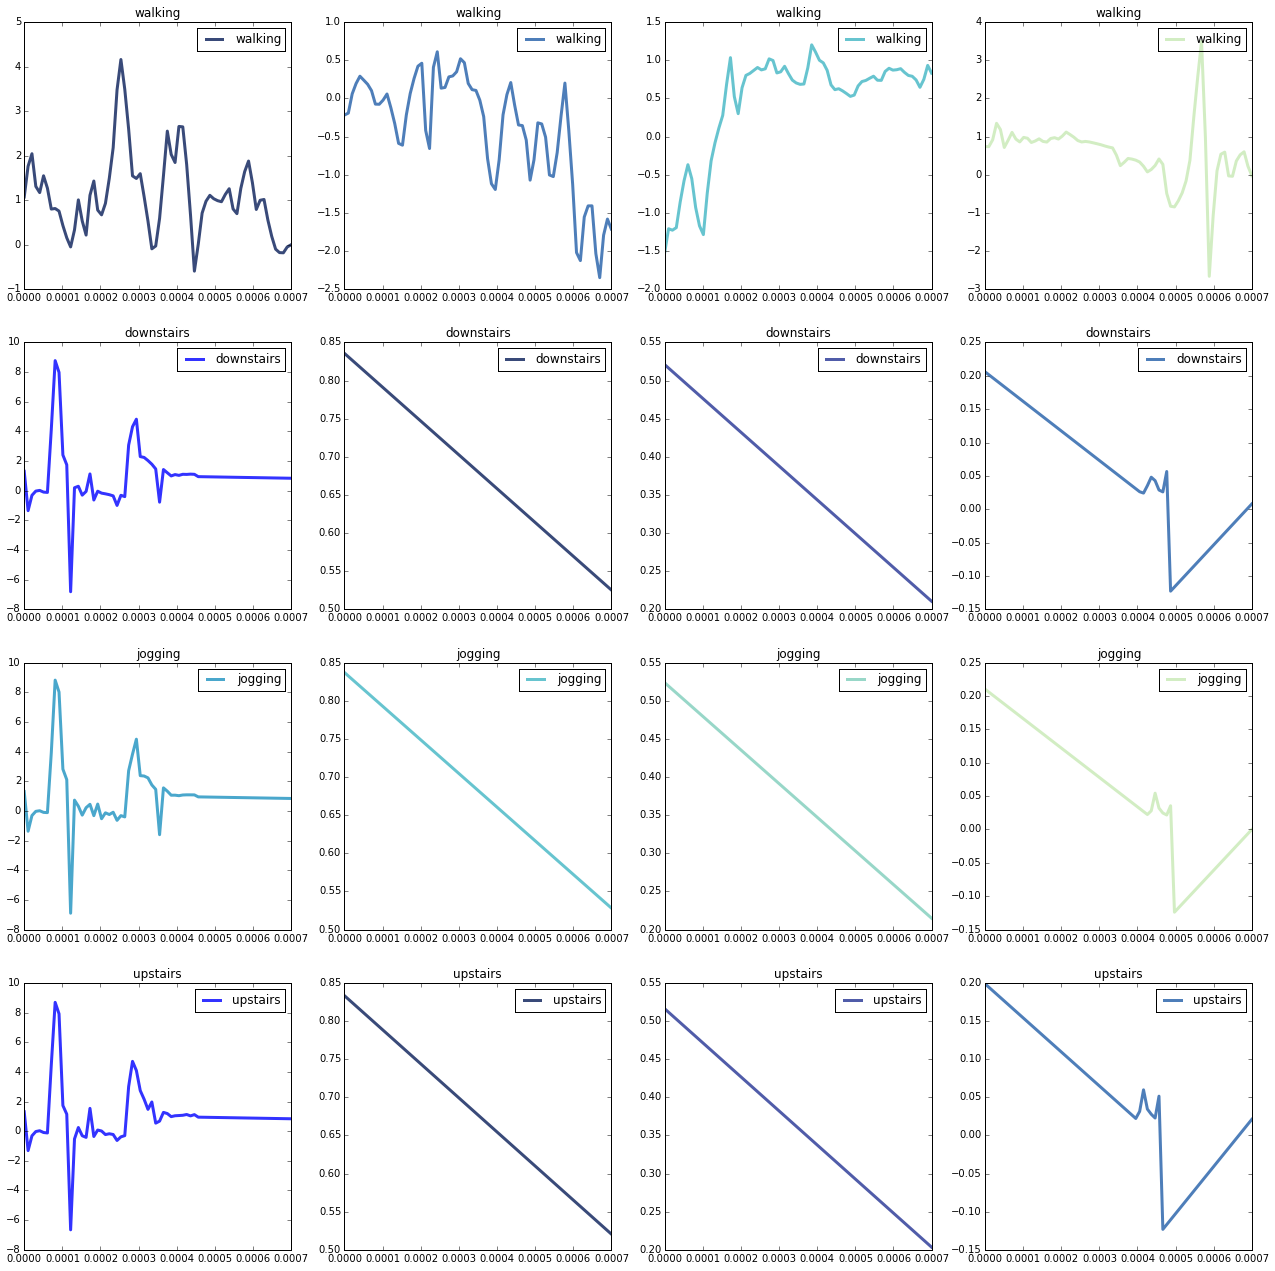

In [60]:
thinkplot.preplot(4, 4, 4)

for plotnum, (activity, data) in enumerate(meg_data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    zwave = thinkdsp.Wave(interp_vals, framerate=100000)

    start0 = 0
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        thinkplot.subplot(4*plotnum+1+i)
        zseg.plot(label=activity)
        thinkplot.Config(title=activity)

###Frequency